In [1]:
!pip install sgp4

Defaulting to user installation because normal site-packages is not writeable


In [143]:
##Imports

import matplotlib.pyplot as plt 
import numpy as np
import numpy.ma as ma
import photutils as pu
from astropy.io import ascii
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import astropy.constants as con
import astropy.coordinates as coo
from astropy.coordinates import SkyCoord
from astropy.coordinates import ITRS
from astropy.coordinates import EarthLocation, AltAz
from astropy.coordinates import TEME, CartesianDifferential, CartesianRepresentation
import astropy.time as ti
from photutils.detection import DAOStarFinder
from photutils.detection import IRAFStarFinder
import astropy.units as u
from glob import glob
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from scipy.io import savemat
from scipy.io import loadmat
from sgp4.api import Satrec
from sgp4.api import SGP4_ERRORS


In [77]:
Bias_files = glob('/home/saro9934/astr3510/FinalProject/Bias-11-30/*.fit') #import bias images
Bias_images = [] #create empty array
for f in Bias_files:
    this_image = fits.open(f)[0].data #pull the detector data for one image
    Bias_images.append(this_image) #add the image to our array
Bias_median = np.median(Bias_images, axis=0) #take the median of each pixel in each array

In [78]:
Dark_files = glob('/home/saro9934/astr3510/FinalProject/Dark-11-30/*.fit')
Dark_images = [] #create empty array
for f in Dark_files:
    this_image = fits.open(f)[0].data #pull the detector data for one image
    Dark_images.append(this_image) #add the image to our array
Dark_median = np.median(Dark_images, axis = 0) #take the median of each pixel in each array

In [79]:
FF_files = glob('/home/saro9934/astr3510/FinalProject/FlatField-11-30/*.fit')
FF_images = [] #create empty array
for f in FF_files:
    this_image = fits.open(f)[0].data #pulls an image into an array
    median = np.median(this_image) #takes the mean value of each image
    this_image = this_image/median #normalizes the image to get values near 1.␣
    FF_images.append(this_image) #stacks normalized images into the same array
FF_median = np.median(FF_images, axis=0) #take the median of each pixel in each array

In [93]:
starlink_folders = [
    '/home/saro9934/astr3510/FinalProject/Starlink-1033-11-27/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-3815-11-27/*.fit', 
    '/home/saro9934/astr3510/FinalProject/Starlink-3130-11-27/*.fit', 
    '/home/saro9934/astr3510/FinalProject/Starlink-2216-11-27/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-2134-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-3699-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1400-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-2055-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1407-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1405-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1332-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-4212-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1990-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1434-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-1417-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-3884-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-3916-11-30/*.fit',
    '/home/saro9934/astr3510/FinalProject/Starlink-2445-12-4/*.fit']
Starlink_images = []

In [116]:
star_folders = [
    '/home/saro9934/astr3510/FinalProject/Star-1033-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-3815-12-4/*.fit', 
    '/home/saro9934/astr3510/FinalProject/Star-3130-12-4/*.fit', 
    '/home/saro9934/astr3510/FinalProject/Star-2216-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-2134-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-3699-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1400-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-2055-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1407-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1405-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1332-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-4212-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1990-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1434-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-1417-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-3884-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-3916-12-4/*.fit',
    '/home/saro9934/astr3510/FinalProject/Star-2445-12-4/*.fit']
Star_images = []


In [95]:
for folder in starlink_folders:
    starlink_folder = glob(folder)
    images = []
    for f in starlink_folder:
        this_image = fits.open(f)[0].data #pull the detector data for one image
        images.append(this_image) #add the image to our array
    images = np.array(images)
    Starlink_images.append(images)

#print(Starlink_images[0])

In [96]:
for folder in star_folders:
    star_folders = glob(folder)
    images = []
    for f in star_folders:
        this_image = fits.open(f)[0].data #pull the detector data for one image
        images.append(this_image) #add the image to our array
    images = np.array(images)
    Star_images.append(images)

In [99]:
s = [
    '1 44738U 19074AB  22331.40054903  .00001263  00000+0  10369-3 0  9996', #1033 nov 27
    '1 52338U 22045H   22331.33981463 -.00000526  00000+0 -14977-4 0  9998',  #3815
    '1 49437U 21104AF  22331.41245963 -.00000678  00000+0 -24429-4 0  9997',  #3130
    '1 48012U 21024AM  22331.58334491  .00061509  00000+0  92871-3 0  9992', #2216
    '1 47407U 21005BL  22334.06871382  .00001188  00000+0  98684-4 0  9995',  #2134 nov 30
    '1 51966U 22025L   22333.80629936  .00000909  00000+0  75258-4 0  9992',  #3699
    '1 45700U 20035AV  22333.47665333  .00002311  00000+0  17401-3 0  9998',  #1400
    '1 47358U 21005K   22333.41166318  .00001720  00000+0  13431-3 0  9992',  #2055
    '1 45703U 20035AY  22334.08116150  .00001930  00000+0  14843-3 0  9990',  #1407
    '1 45702U 20035AX  22333.48770888  .00000800  00000+0  72608-4 0  9995',  #1405
    '1 45579U 20025BA  22333.62410946  .00001011  00000+0  86750-4 0  9996',  #1332
    '1 52846U 22062S   22333.49487044  .00001675  00000+0  12331-3 0  9991',  #4212
    '1 47586U 21009AQ  22334.10465152 -.00000750  00000+0 -31429-4 0  9996',  #1990
    '1 45712U 20035BH  22334.10695088  .00000808  00000+0  73102-4 0  9992',  #1434
    '1 45693U 20035AN  22333.51535776  .00002051  00000+0  15658-3 0  9994',  #1417
    '1 52497U 22049AY  22333.52110114  .00001022  00000+0  82327-4 0  9992',  #3884
    '1 52492U 22049AT  22334.12093922  .00003194  00000+0  21872-3 0  9990',  #3916
    '1 47656U 21012AN  22334.12583565 -.00000219  00000+0  41643-5 0  9998',  #2040
    '1 48109U 21027T   22337.80440792  .00001076  00000+0  91096-4 0  9997'  #2445 dec 4
] #fill in with each s-value for all our satellites
t = [
    '2 44738  53.0531 185.9585 0001881  53.8801 306.2362 15.06397380167850', #1033 nov 27
    '2 52338  53.2152 188.7380 0001756  44.4066 315.7067 15.08842610 34730',  #3815 
    '2 49437  53.2148 188.4070 0002975  38.2312 321.8891 15.08842381 59086',  #3130
    '2 48012  53.0492 192.5615 0003625 177.0643 295.1562 15.54172683  1309',  #2216
    '2 47407  53.0553 358.9837 0001609  63.6445 296.4709 15.06390693103869',  #2134 nov 30
    '2 51966  53.2185 357.6584 0002513  31.8694 328.2450 15.08836020 40666',  #3699
    '2 45700  53.0573   6.6317 0001437  76.3231 283.7918 15.06395214138445',  #1400
    '2 47358  53.0546   1.9239 0001431  60.9535 299.1597 15.06399328103151',  #2055
    '2 45703  53.0554   3.9263 0002505  44.9316 315.1876 15.06401423138532',  #1407
    '2 45702  53.0571   6.5821 0001436  73.6296 286.4851 15.06391578138854',  #1405
    '2 45579  53.0565   6.1233 0001392  77.6260 282.4884 15.06398782145795',  #1332
    '2 52846  53.2175   4.0580 0002708  24.0862 336.0256 15.08839178 25200',  #4212
    '2 47586  53.0557   8.8160 0002171  58.0855 302.0345 15.06393752100911',  #1900
    '2 45712  53.0540   3.7955 0001430  67.7275 292.3866 15.06399180138548',  #1434
    '2 45693  53.0553  26.4695 0001266  84.4755 275.6379 15.06391799138573',  #1417
    '2 52497  53.2178  18.9456 0002827  30.7482 329.3676 15.08835749 31977',  #3884
    '2 52492  53.2172  16.2476 0002473  29.4785 330.6347 15.08840604 32064',  #3916
    '2 47656  53.0559  18.7268 0000927  55.5053 304.6023 15.06392952 99547',  #2040
    '2 48109  53.0551 122.2066 0001893  67.4039 292.7150 15.06405550 92774'  #2445 dec 4
    ] #fill in with each t-value for all our satellites
print(len(s), len(t))
tle_data = []
for k in range(0, len(s)):
    tle = Satrec.twoline2rv(s[k], t[k])
    tle_data.append(tle)

19 19


In [126]:
mag_sun = -26.47
SA = 2.4*1.4 #2.4 m * 1.4 m, the width of gen 1 sats
BA = 0.2 #the bond albedo of gen 1 sats

comp_times = []
comp_airmass = []
comp_azim = []
comp_alti = []
comp_rho_sat = []
comp_phase_angle = []
comp_est_mag = []
folder_num = 0
for folder in starlink_folders:
    starlink_folder = glob(folder)
    sat_header = [] #Put into thing

    for d in starlink_folder: #turns file into array
        this_header = fits.open(d)[0].header
        sat_header.append(this_header) # puts all biases into a single array, making an array of arrays

    times = []
    airmass = []
    azim = []
    alti = []
    list_length = len(sat_header)
    for f in range(list_length):
        h = sat_header[f]
        this_time = h['DATE-OBS']
        times.append(this_time)
        this_airmass = h['AIRMASS']
        airmass.append(this_airmass)
        this_azim = h['CENTAZ']
        azim.append(this_azim)
        this_alti = h['CENTALT']
        alti.append(this_alti)
    
    astropy_times = ti.Time(times)
    comp_times.append(ti.Time(times))
    comp_airmass.append(airmass)
    comp_azim.append(azim)
    comp_alti.append(alti)
    rho_sat = []
    phase_angle = []
    for t in astropy_times:
        error_code, teme_p, teme_v = tle_data[folder_num].sgp4(t.jd1, t.jd2)  # in km and km/s
        if error_code != 0:
            raise RuntimeError(SGP4_ERRORS[error_code])
        teme_p = CartesianRepresentation(teme_p*u.km) #Giving our coordinate system a cartesian frame
        teme_v = CartesianDifferential(teme_v*u.km/u.s) #cartesian frame for velocity
        teme = TEME(teme_p.with_differentials(teme_v), obstime=t) #true equatorial mean equinox, center of our xyz coords
        itrs = teme.transform_to(ITRS(obstime=t))  
        location = itrs.earth_location #gives location of satellite
        sbo = coo.EarthLocation(lon=-105.2630*u.deg, lat=40.00371*u.deg, height=1653*u.m) #location of SBOm) 
        aa = teme.transform_to(AltAz(obstime=t, location=sbo))  #altitude and azimuth of sat for each time
        this_rho_sat = location.geodetic.height/np.sin(aa.alt.rad)#the satellite's distance from observer
        rho_sat.append(this_rho_sat)
        x_sat = this_rho_sat*np.sin(np.pi/2 - aa.alt.rad)*np.cos(aa.az.rad) #x cartesian
        y_sat = this_rho_sat*np.sin(np.pi/2 - aa.alt.rad)*np.sin(aa.az.rad) #y cartesian
        z_sat = this_rho_sat*np.cos(np.pi/2 - aa.alt.rad) #z cartesian
        vector_sat = u.Quantity([x_sat, y_sat, z_sat]) # puts xyz into a vector
        frame = coo.AltAz(obstime=t, location=sbo) #reference frame for our observation
        sun = coo.get_sun(t) #gets the location of the sun for each of our times
        horizon_sun = sun.transform_to(frame) #gives us the location of the sun within our frame
        rho_sun = 1.5*10**8*u.km
        x_sun = rho_sun*np.sin(np.pi/2 - horizon_sun.alt.rad)*np.cos(horizon_sun.az.rad)
        y_sun = rho_sun*np.sin(np.pi/2 - horizon_sun.alt.rad)*np.sin(horizon_sun.az.rad)
        z_sun = rho_sun*np.cos(np.pi/2 - horizon_sun.alt.rad)
        vector_sun = u.Quantity([x_sun, y_sun, z_sun])
        dot_prod = np.dot(vector_sat, vector_sun) #dot product of the satellite's vector and the sun's vector
        rad_prod = np.abs(this_rho_sat*rho_sun) # the radial product, taking the magnitudes and multiplying
        cos_theta = dot_prod/rad_prod 
        this_phase_angle = np.arccos(cos_theta) #getting the angle from our dot
        phase_angle.append(this_phase_angle)
    comp_rho_sat.append(rho_sat)
    comp_phase_angle.append(phase_angle)

    rho_sat_clean = u.Quantity(rho_sat)
    R = np.absolute(rho_sat_clean).to_value('km')*10**3
    phase_angle_clean = u.Quantity(phase_angle)
    PA = phase_angle_clean.to_value('rad')
    est_mag = mag_sun - 2.5*np.log10(2/(3*np.pi**2)*SA*BA*((np.pi - PA)*np.cos(PA)+np.sin(PA))) + 5*np.log10(R)
    comp_est_mag.append(est_mag)
    folder_num = folder_num + 1

print(comp_est_mag)

[array([6.33713917, 7.92416244, 5.44351805, 5.48328756, 5.74350903,
       5.65094295, 5.57116939, 6.74058998, 5.40463858, 5.40295456,
       5.42218569, 5.45598001, 7.27853775, 7.79756771, 5.41630595,
       6.47032776, 7.54067824, 7.41025595, 7.66976452, 5.84724772,
       5.96020967, 5.50581545, 7.14548743, 5.53405581, 6.87614597,
       6.20682336, 6.60511564, 6.08063319, 7.01123148]), array([6.45519209, 5.92203869, 6.17890955, 6.27623894, 5.43570729,
       5.98998385, 5.70095998, 7.69749499, 7.95560167, 6.5965199 ,
       6.31553446, 5.89958501, 6.17879695, 6.08319089, 5.6093189 ,
       5.40735852, 5.53312332, 5.43151603, 8.08226782, 5.81302779,
       7.56574249, 5.41061328, 5.731069  , 7.43217825, 6.8798599 ,
       5.47355799, 7.15932359, 7.29659043, 7.82735836, 6.73846805,
       6.04707846, 5.80590406, 7.02038523]), array([6.83913938, 6.57539711, 7.62592433, 5.56372778, 7.75401457,
       7.10404183, 5.52358561, 6.19486789, 5.47865998, 5.48815246,
       6.31843825, 6.70671

In [21]:
comp_times[0].jd

array([2459911.52217433, 2459911.52307647, 2459911.52112176,
       2459911.52104653, 2459911.52179844, 2459911.52172326,
       2459911.52164801, 2459911.52239992, 2459911.52134721,
       2459911.52127208, 2459911.52142244, 2459911.52149767,
       2459911.52270069, 2459911.52300132, 2459911.52119689,
       2459911.52224956, 2459911.522851  , 2459911.52277583,
       2459911.52292616, 2459911.52187363, 2459911.52194878,
       2459911.5215728 , 2459911.52262552, 2459911.52097135,
       2459911.5224751 , 2459911.52209914, 2459911.52232476,
       2459911.52202395, 2459911.5225503 ])

In [102]:
P_light = []
comp_satellite_flux = []
comp_satellite_uncertainty = []
comp_std_of_mean = []
comp_mean_of_std = []

for image_collection in Starlink_images:
    this_P_light_sat = ((image_collection - Dark_median)/FF_median)*0.31
    P_light.append(this_P_light_sat)

    mean = []
    median = []
    std = []
    satellite_flux = []
    satellite_uncertainty = []

    for i in range(0, len(this_P_light_sat)):
        max_pixel = np.argmax(this_P_light_sat[i]) #find brightest pixel in image
        row, col = np.unravel_index(max_pixel, this_P_light_sat[i].shape) #put it inot row and column
        # create some photutils aperture objects
        satellite_aperture = pu.CircularAperture([col,row], r=100) #the rough estimate aperature, oversized
        sky_aperture = pu.CircularAnnulus([col,row], r_in=70, r_out=120) ##potentially adjust for satellite size
        sky_stats = pu.ApertureStats(this_P_light_sat[i,:, :], satellite_aperture)
        sat_fwhm = sky_stats.fwhm #full-width half-maximum estimates a radius for our aperture
        sat_fwhm = sat_fwhm.to_value('pix')
        satellite_aperture = pu.CircularAperture([col,row], r=sat_fwhm) #potentially adjust this for satellite size
        # do photometry on an image using an aperture
        mean_junk, median_junk, std_junk = sigma_clipped_stats(this_P_light_sat[i,:, :], sigma=3.0) #gets statistics for each image
        mean.append(mean_junk) #puts the mean into an array of means
        median.append(median_junk)
        std.append(std_junk)
        uncert_sat = np.sqrt(np.absolute(this_P_light_sat[i]) + 15**2)
        aperture_flux, aperture_uncertainty = satellite_aperture.do_photometry(this_P_light_sat[i,:, :], error=uncert_sat)
        #Running Statistics
        # calculate statistics on the pixels in the sky aperture
        sky_stats = pu.ApertureStats(this_P_light_sat[i,:, :], sky_aperture)
        # calculate an estimate of the sky per pixel
        sky_per_pixel = sky_stats.median
        # calculate how much sky flux must be in our star aperture
        sky_flux = satellite_aperture.area*sky_per_pixel
        # subtract the sky from the aperture flux 
        this_satellite_flux = aperture_flux[0] - sky_flux #we care about this for mag calc
        this_satellite_uncertainty = aperture_uncertainty[0] #we care about this for mag calc
        satellite_flux.append(this_satellite_flux)
        satellite_uncertainty.append(this_satellite_uncertainty)
    
    mean_of_std = np.sqrt(np.nanmean(satellite_uncertainty)**2 + 15**2) 
    std_of_mean = mean_of_std/np.sqrt(len(this_P_light_sat)) #takes the STD and divides it by the number of photos to get std of
    comp_satellite_flux.append(satellite_flux)
    comp_satellite_uncertainty.append(satellite_uncertainty)
    comp_std_of_mean.append(std_of_mean)
    comp_mean_of_std.append(mean_of_std)


#print("Uncertainty")
#print(comp_satellite_uncertainty)
#print("Flux")
#print(comp_satellite_flux)

    



[1.38547703 2.37244582 1.24430407 1.28265188 1.1904214  1.16956509
 1.15544696 1.56711065 1.16662673 1.18617509 1.15367877 1.14745068
 1.8760538  2.26293121 1.21219302 1.4408969  2.05910623 1.9656553
 2.15886038 1.21750241 1.25072957 1.14804487 1.79195769 1.32636533
 1.63718266 1.33488004 1.50173688 1.29015104 1.71250742]


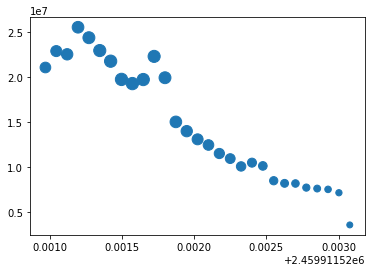

In [103]:
bingo = np.array(comp_airmass[0])
print(bingo)
plt.scatter(comp_times[0].jd, comp_satellite_flux[0], s = ((1/bingo)**2)*200)

In [117]:
mag_star = [11.5, 10.43, 11.65, 7.66, 10.68, 8.89, 10.29, 12.28, 10,56, 9.67, 
8.07, 10.39, 10.96, 9.66, 7.37, 11.94, 12.58, 9.63, 8.74, 7.97]
comp_star_RA = []
comp_star_DEC = []
comp_star_airmass = []
for z in star_folders:
    star_files = glob(z)
    star_header = [] #Put into thing
    for g in star_files: #turns file into array
        this_header = fits.open(g)[0].header
        star_header.append(this_header) # puts all biases into a single array, making an array of arrays

    RA = []
    DEC = []
    star_airmass = []
    for m in range(0, len(star_header)):
        h = star_header[m]
        this_RA = h['OBJCTRA'] #pull right ascention from the data 
        RA.append(this_RA)
        this_dec = h['OBJCTDEC']
        DEC.append(this_dec)
        this_star_airmass = h['AIRMASS']
        star_airmass.append(this_star_airmass)
    comp_star_RA.append(RA)
    comp_star_DEC.append(DEC)
    comp_star_airmass.append(np.mean(star_airmass))
print(comp_star_airmass, len(comp_star_airmass))

[1.1527476107639458, 2.345167765949703, 1.297355024629064, 1.1090249835416783, 2.399586367383677, 2.049680787376131, 2.2722769464655337, 2.0314665885133874, 1.9350906179558411, 2.5769099702774496, 2.030753942725846, 1.742842778190485, 1.1853507817374676, 3.203464014793212, 2.2931396893905993, 1.8318920336273556, 1.503674612016365, 1.1999743792846833] 18


In [105]:
P_light_star = []
comp_star_flux = []
comp_star_uncertainty = []
comp_std_of_mean_star = []
comp_mean_of_std_star = []

for image_collection in Star_images:
    this_P_light_star = ((image_collection - Dark_median)/FF_median)*0.31
    P_light_star.append(this_P_light_star)

    mean = []
    median = []
    std = []
    star_flux = []
    star_uncertainty = []

    for i in range(0, len(this_P_light_star)):
        max_pixel = np.argmax(this_P_light_star[i]) #find brightest pixel in image
        row, col = np.unravel_index(max_pixel, this_P_light_star[i].shape) #put it inot row and column
        # create some photutils aperture objects
        satellite_aperture = pu.CircularAperture([col,row], r=50) #the rough estimate aperature, oversized
        sky_aperture = pu.CircularAnnulus([col,row], r_in=60, r_out=80) ##potentially adjust for satellite size
        sky_stats = pu.ApertureStats(this_P_light_star[i,:, :], satellite_aperture)
        sat_fwhm = sky_stats.fwhm #full-width half-maximum estimates a radius for our aperture
        sat_fwhm = sat_fwhm.to_value('pix')
        satellite_aperture = pu.CircularAperture([col,row], r=sat_fwhm) #potentially adjust this for satellite size
        # do photometry on an image using an aperture
        mean_junk, median_junk, std_junk = sigma_clipped_stats(this_P_light_star[i,:, :], sigma=3.0) #gets statistics for each image
        mean.append(mean_junk) #puts the mean into an array of means
        median.append(median_junk)
        std.append(std_junk)
        uncert_sat = np.sqrt(np.absolute(this_P_light_star[i]) + 15**2)
        aperture_flux, aperture_uncertainty = satellite_aperture.do_photometry(this_P_light_star[i,:, :], error=uncert_sat)
        #Running Statistics
        # calculate statistics on the pixels in the sky aperture
        sky_stats = pu.ApertureStats(this_P_light_star[i,:, :], sky_aperture)
        # calculate an estimate of the sky per pixel
        sky_per_pixel = sky_stats.median
        # calculate how much sky flux must be in our star aperture
        sky_flux = satellite_aperture.area*sky_per_pixel
        # subtract the sky from the aperture flux 
        this_star_flux = aperture_flux[0] - sky_flux #we care about this for mag calc
        this_star_uncertainty = aperture_uncertainty[0] #we care about this for mag calc
        star_flux.append(this_star_flux)
        star_uncertainty.append(this_star_uncertainty)

    mean_of_std_star = np.sqrt(np.nanmean(star_uncertainty)**2 + 15**2) 
    std_of_mean_star = mean_of_std_star/np.sqrt(len(this_P_light_star)) #takes the STD and divides it by the number of photos to get std of
    star_flux_average = np.mean(star_flux)
    star_uncertainty_average = np.nanmean(star_uncertainty)/len(star_uncertainty)
    comp_star_flux.append(star_flux_average)
    comp_star_uncertainty.append(star_uncertainty_average)
    comp_std_of_mean_star.append(std_of_mean_star)
    comp_mean_of_std_star.append(mean_of_std_star)
    print(star_flux_average)

#print("Uncertainty")
#print(comp_star_uncertainty)
#print("Flux")
#print(comp_star_flux)
#print(star_flux_average)

9367.055895214464
5994.672520138808
4666.769157507093
2242503.487129033
6099.480899910482
5968.717561605231
25574.392470590345
4481.33610787491
224305.50613348096
431248.49010234146
2112707.0979756694
6026.743525729049
214780.33053137615
1591962.0293728197
53023.212159338036
6165.450900171709
22801.396865333158
610754.8479396946


In [119]:
area = np.pi*25.4**2 #aperture of Artemis telescope (units of cm^2)
comp_f_sat = []
f_star = []
comp_mag_sat = []
for o in range(0, len(comp_satellite_flux)):
    this_sat = comp_satellite_flux[o]
    f_sat = []
    for a in range(0, len(this_sat)):
        this_f_sat = this_sat[a]/(area*5) #equation for finding the flux of satellites (t = 5 seconds)
        f_sat.append(this_f_sat)
    comp_f_sat.append(f_sat)

    

for p in range(0, len(comp_star_flux)):
    this_f_star = comp_star_flux[p]/(area*5) #equation for finding the flux of stars (t = 5 seconds)
    f_star.append(this_f_star)
print(len(comp_f_sat), len(comp_star_airmass))
for q in range(0, len(comp_f_sat)):
    this_sat = comp_f_sat[q]
    this_airmass = comp_airmass[q]
    this_star_airmass = np.mean(comp_star_airmass[q]) #average airmass
    mag_sat = []
    for r in range(0, len(this_sat)):
        delta_mag_sat = 0.15*this_airmass[r]
        delta_mag_star = 0.15*this_star_airmass
        this_mag_sat = (mag_star[q] - delta_mag_star) -2.5*np.log10(this_sat[r]/f_star[q]) - delta_mag_sat
        mag_sat.append(this_mag_sat)
    comp_mag_sat.append(mag_sat)
    
print(comp_mag_sat)


18 18
[[3.396647651908823, 4.513971160412387, 2.689441395874756, 2.6665979083771476, 2.8306362242762844, 2.7117806034443914, 2.846905199315469, 3.469647699687094, 2.6811486654268797, 2.6127191837537005, 2.7404766327759797, 2.8473009288854416, 3.6934007517633716, 3.780827766149122, 2.5583312984892776, 3.442970716925436, 3.7431681571601314, 3.742237649735825, 3.7409722634513276, 3.1330840054700473, 3.205098178304365, 2.872980769722368, 3.703818173326243, 2.7500158212292187, 3.4971677595084687, 3.3186714377961435, 3.5236966062605877, 3.271856112925688, 3.6779900430012784], [2.179163943207757, 1.5731987780932497, 1.9326033993578007, 1.0455868595390252, 1.079081630555264, 1.0150160593404858, 1.6446870116214243, 2.5828917713586024, 2.4677905128784734, 2.291524100402057, 2.0717381175185556, 0.872761821018655, 0.7673604850231406, 0.9670472423534273, 1.5848567831972322, 1.0571876059712944, 1.4011964548989657, 1.2342659220635022, 2.8294356881810616, 0.942402046638481, 2.503510269979803, 1.047119

/tmp/ipykernel_9258/402124139.py:27: RuntimeWarning: invalid value encountered in log10
  this_mag_sat = (mag_star[q] - delta_mag_star) -2.5*np.log10(this_sat[r]/f_star[q]) - delta_mag_sat


In [123]:
comp_mag_uncertainty = []
for o in range(0, len(comp_satellite_flux)):
    this_sat_flux = comp_satellite_flux[o]
    this_sat_uncert = comp_satellite_uncertainty[o]
    mag_uncertainty = []
    for i in range(0, len(this_sat_flux)):
        this_mag_uncertainty = 1.086*((this_sat_uncert[i])/this_sat_flux[i])
        mag_uncertainty.append(this_mag_uncertainty)
    comp_mag_uncertainty.append(mag_uncertainty)
print(comp_mag_uncertainty)

[[0.00040995563644364143, 0.0011998695903665862, 0.0002618763854491088, 0.0002606603522062544, 0.0002726590933495211, 0.0002545195939108377, 0.00027530851132603396, 0.00044796960924524686, 0.00025345926976749983, 0.0002456959882228505, 0.000260425332049468, 0.0002774107565548713, 0.0005732440030701873, 0.0006738867999962437, 0.00023914579233587997, 0.00042795647420473587, 0.0006233207789148349, 0.0006094546701772693, 0.0006365353383014753, 0.0003312232868245119, 0.00034966146686755647, 0.00027978220521119267, 0.0005671743939707859, 0.0002798343861892928, 0.0004644121246609452, 0.0003835484968913668, 0.00046074709006422394, 0.00036821730724222716, 0.0005448100889164818], [0.0005472217235626795, 0.0003453318227539371, 0.0004429946181253394, 0.0002943570063759859, 0.0002650865518978118, 0.00027274293499308277, 0.0003574871916956932, 0.0009191346414077805, 0.0008731196983701179, 0.0006035800680127094, 0.0004969527749953939, 0.0002478852807113069, 0.00024033161167165212, 0.00026761836699217

In [125]:
comp_mag_error_percent = [] 
for sat in comp_est_mag:
    est_mag_now = comp_est_mag[sat] #calls the estimaged magnitudes for each satellite
    mag_sat_now = comp_mag_sat[sat] #calls the observed magnitudes for each satellite
    mag_error_percent = []
    for mag in est_mag_now:
        #calls a satellite's estimated magnitudes in order of image taken
        this_est_mag = est_mag_now[mag] 
        #calls a satellite's observed magnitudes in order of image taken
        this_mag_sat = mag_sat_now[mag]
        #takes the error percent of the estimated magnitude compared to the observed
        this_mag_error_percent = (this_est_mag - this_mag_sat)/this_mag_sat
        #catalogues the errors into a list for this satelite
        mag_error_percent.append(this_mag_error_percent) 
    #catalogues all the statellite's errors into a larger list
    comp_mag_error_percent.apend(mag_error_percent)
print(comp_mag_error_percent)

TypeError: only integer scalar arrays can be converted to a scalar index

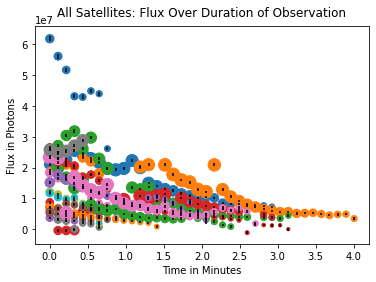

In [176]:
for j in range(0, len(comp_times)):
    jd = comp_times[j].jd
    time = jd - np.min(jd)
    bingo = np.array(comp_airmass[j])
    plt.scatter((jd-np.min(jd))*24*60, comp_satellite_flux[j], s = ((1/bingo)**2)*200)
    plt.errorbar((jd-np.min(jd))*24*60, comp_satellite_flux[j], yerr=np.array(comp_satellite_uncertainty[j])*100, linewidth = 0, elinewidth=1.5, color = 'black')
    plt.title("All Satellites: Flux Over Duration of Observation", pad = 10)
    plt.xlabel("Time in Minutes")
    plt.ylabel("Flux in Photons");


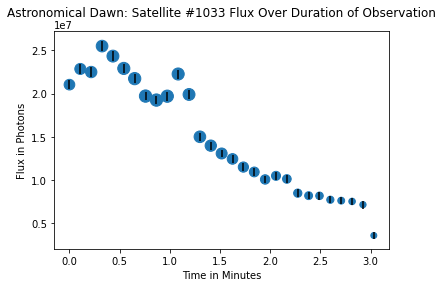

In [174]:
jd = comp_times[0].jd
time = jd - np.min(jd)
bingo = np.array(comp_airmass[0])
plt.scatter((jd-np.min(jd))*24*60, comp_satellite_flux[0],s = ((1/bingo)**2)*200)
plt.errorbar((jd-np.min(jd))*24*60, comp_satellite_flux[0], yerr=np.array(comp_satellite_uncertainty[0])*100, linewidth = 0, elinewidth=1.5, color = 'black')
plt.title("Astronomical Dawn: Satellite #1033 Flux Over Duration of Observation", pad = 15)
plt.xlabel("Time in Minutes")
plt.ylabel("Flux in Photons");

18


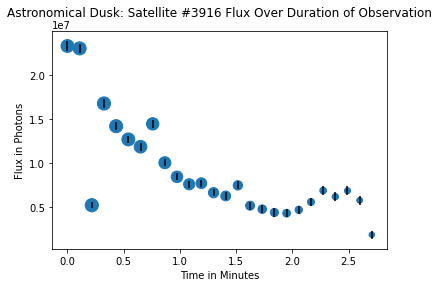

In [182]:
t = 16
x = 0
print(len(comp_times))
jd = comp_times[t].jd
time = jd - np.min(jd)
bingo = np.array(comp_airmass[t])
plt.scatter((jd-np.min(jd))*24*60, comp_satellite_flux[t],s = ((1/bingo)**2)*200)
plt.errorbar((jd-np.min(jd))*24*60, comp_satellite_flux[t], yerr=np.array(comp_satellite_uncertainty[t])*100, linewidth = 0, elinewidth=1.5, color = 'black')
plt.title("Astronomical Dusk: Satellite #3916 Flux Over Duration of Observation", pad = 15)
plt.xlabel("Time in Minutes")
plt.ylabel("Flux in Photons");

18


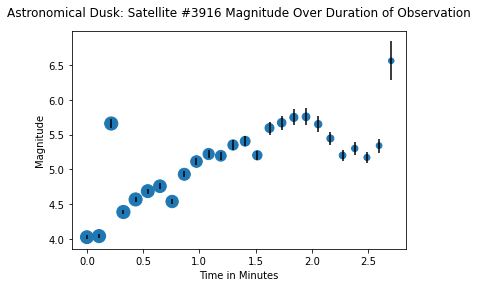

In [172]:
t = 16
print(len(comp_times))
jd = comp_times[t].jd
time = jd - np.min(jd)
bingo = np.array(comp_airmass[t])
plt.scatter((jd-np.min(jd))*24*60, comp_mag_sat[t],s = ((1/bingo)**2)*200)
plt.errorbar((jd-np.min(jd))*24*60, comp_mag_sat[t], yerr=np.array(comp_mag_uncertainty[t])*100, linewidth = 0, elinewidth=1.5, color = 'black')
plt.title("Astronomical Dusk: Satellite #3916 Magnitude Over Duration of Observation", pad = 15)
plt.xlabel("Time in Minutes")
plt.ylabel("Magnitude");

18


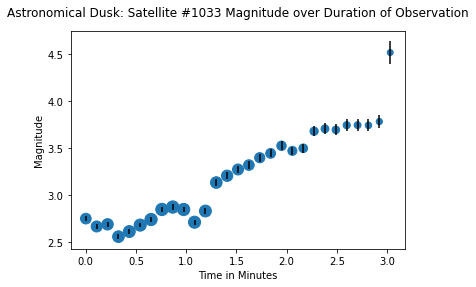

In [177]:
t = 0
print(len(comp_times))
jd = comp_times[t].jd
time = jd - np.min(jd)
bingo = np.array(comp_airmass[t])
plt.scatter((jd-np.min(jd))*24*60, comp_mag_sat[t],s = ((1/bingo)**2)*200)
plt.errorbar((jd-np.min(jd))*24*60, comp_mag_sat[t], yerr=np.array(comp_mag_uncertainty[t])*100, linewidth = 0, elinewidth=1.5, color = 'black')
plt.title("Astronomical Dusk: Satellite #1033 Magnitude over Duration of Observation", pad = 15)
plt.xlabel("Time in Minutes")
plt.ylabel("Magnitude");

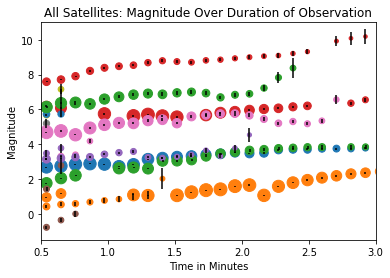

In [178]:
for j in range(0, len(comp_times)):
    jd = comp_times[j].jd
    time = jd - np.min(jd)
    bingo = np.array(comp_airmass[j])
    plt.scatter((jd-np.min(jd))*24*60, comp_mag_sat[j], s = ((1/bingo)**2)*200)
    plt.errorbar((jd-np.min(jd))*24*60, comp_mag_sat[j], yerr=np.array(comp_mag_uncertainty[j])*100, linewidth = 0, elinewidth=1.5, color = 'black')
    plt.ylim(-1.5,11)
    plt.xlim(0.5, 3.0)
    plt.title("All Satellites: Magnitude Over Duration of Observation")
    plt.xlabel("Time in Minutes")
    plt.ylabel("Magnitude");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e816270d-b5ec-4b6c-bf96-ed7233bee788' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>